# KNeighboursClassifier (K-Nearest Neighbours)

O algoritmo K-Nearest Neighbours é um tipo de aprendizado supervisionado de classificação multi-classe prevendo não somente targets binários.

Para isso, cada observação do banco de dados é vista como um ponto situado em um espaço n-dimensional cujas coordenadas são as variáveis analisadas (e n é o número de variáveis), assim como no K-Means por exemplo. O algoritmo busca simplesmente detectar e criar um subconjunto contendo quais são as classes das K observações mais próximas ao ponto escolhido. A probabilidade de que o ponto pertença a cada classe equivale à proporção entre número de vezes em que essa classe aparece no subconjunto, dividida por k. O resultado previsto pelo modelo é a classe que detêm maior probabilidade dentro desse subconjunto, ou seja, cujos valores estão mais próximos do ponto escolhido. 

Na imagem, os triângulos e os quadrados representam duas classes diferentes. Sendo K = 3, afirmamos que o ponto verde é um triângulo. Se K = 5 (linha pontilhada), afirmamos que o ponto verde é um quadrado.

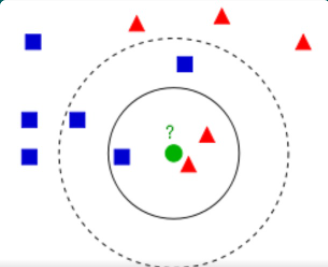

# Construindo o Algoritmo

### Importação das Bibliotecas e Manipulação dos Dados

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc, RocCurveDisplay, f1_score
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("../dados/titanic.csv")
df.drop(["PassengerId", "Name", "SibSp", "Ticket", "Cabin", "Embarked", "Parch"], axis = 1, inplace = True)
df["Sex"] = np.where(df["Sex"] == "male", 1, 0)
df.dropna(inplace = True)
df.head() # Alvo Binário: Survived

X = df.drop("Survived", axis = 1)
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

### Ajuste do Modelo

In [3]:
modelo = KNeighborsClassifier(n_neighbors = 5)
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
y_pred_train = modelo.predict(X_train)

In [21]:
# Probabilidades (lista contendo [P(X), P(Y)])
y_pred_proba = modelo.predict_proba(X_test)[:,1]
y_pred_proba[:10]

array([0.4, 0.8, 0.6, 0.4, 0.8, 0.6, 0.4, 0. , 0.4, 0. ])

### Métricas de Avaliação

In [4]:
# Acurácia
print(accuracy_score(y_test, y_pred))

0.6450381679389313


In [5]:
# Matriz de Confusão
print(confusion_matrix(y_test, y_pred))

[[116  46]
 [ 47  53]]


In [6]:
# Métricas de Avaliação
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.72      0.71       162
           1       0.54      0.53      0.53       100

    accuracy                           0.65       262
   macro avg       0.62      0.62      0.62       262
weighted avg       0.64      0.65      0.64       262



In [9]:
# Calculando a AUC (Area Under the Curve)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

print("AUC - Teste :", roc_auc)

AUC - Teste : 0.6742901234567902


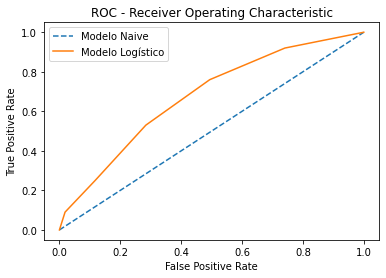

In [10]:
# Criando Curva ROC
fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba)

plt.plot([0,1], [0,1], linestyle = '--', label = 'Modelo Naive')
plt.plot(fpr, tpr, label = 'Modelo Logístico')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("ROC - Receiver Operating Characteristic")
plt.legend()
plt.show()

### Otimização

O único hiperparâmetro a ser otimizado é o valor de K, que seria o número ótimo de observações próximas a se avaliar ao tentar predizer a classe da observação de interesse.

Para encontrar o ponto ótimo, podemos estimar o KNN iterativamente a partir de diversos valores de K, e obter uma métrica de interesse para cada modelo. Devemos chegar a um ponto ótimo em que o modelo não generaliza em excesso, mas também não incorre em overfitting. Essa tarefa pode ser feita pelo método de GridSearch também.

In [32]:
# Como as classes não são balanceadas, utiliza-se o f1-score

f1 = []
for i in np.arange(1, 20):
    modelo_teste = KNeighborsClassifier(n_neighbors = i)
    modelo_teste.fit(X_train, y_train)
    y_pred = modelo_teste.predict(X_test)
    f1.append(f1_score(y_test, y_pred))

Text(0.5, 1.0, 'Comparação entre modelos por F1-Score')

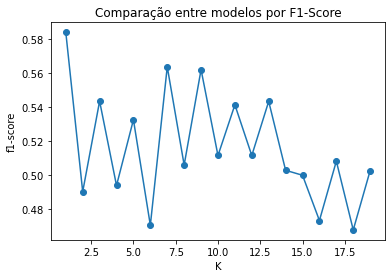

In [31]:
# Gráfico de Cotovelo
plt.plot(np.arange(1, 20), f1, marker = 'o', label = 'Clusters')
plt.xlabel('K')
plt.ylabel('f1-score')
plt.title('Comparação entre modelos por F1-Score')